In [11]:
import os
import numpy as np
import pandas as pd

# define data root
root = r"/gpfs1/pi/djangraw/mindless_reading/ROAMM/subject_ml_data"
# define subject id
subject_id = 's10014'
# load the data
df = pd.read_pickle(os.path.join(root, subject_id, 's10014_run1_ml_data.pkl'))
# filter to fixations that are first pass readings and on reading words
df = df[df["first_pass_reading"]==True]
df = df.drop_duplicates(subset=["fix_fixed_word_key", "fix_tStart"], keep="first")
df = df.dropna(subset=["fix_fixed_word"])
# get the story name
story_name = df["story_name"].iloc[0]

# locate the words around MW onset
df["is_mw_onset"] =  (df["time"] < df["mw_onset"] + 2) & (df["time"] >= df["mw_onset"] - 2)

In [12]:
# get the word embeddings
path = f"res/{story_name}_control_coordinates.csv"
word_embed_df = pd.read_csv(path)
word_embed_df = word_embed_df.rename(columns={"word_key": "fix_fixed_word_key"})

# get the tokens and embeddings using the word key
df = df.merge(word_embed_df[["fix_fixed_word_key", "glove", "word2vec", "contextual"]], on='fix_fixed_word_key', how='left')

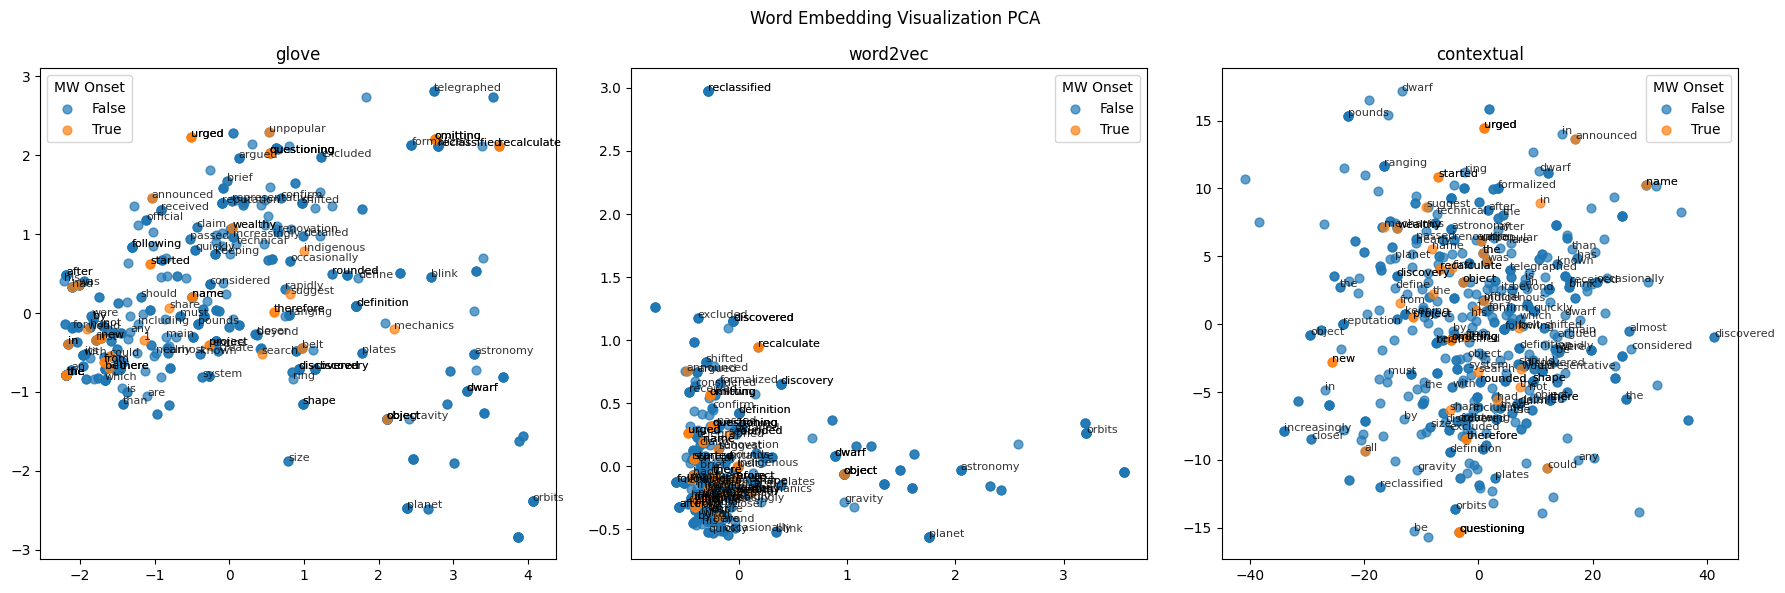

In [37]:
import numpy as np
from sklearn.decomposition import PCA
import ast
import matplotlib.pyplot as plt

df_ori = df.copy()

cols = ["glove", "word2vec", "contextual"]
plt.figure(figsize=(18, 6))
for col in cols:
    df = df.dropna(subset=[col])
    df[col] = df[col].apply(
        lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x
    )

    X = np.vstack(df[col].values)

    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X)

    df["x"] = coords[:, 0]
    df["y"] = coords[:, 1]

    plt.subplot(1, 3, cols.index(col)+1)
    for g, sub in df.groupby("is_mw_onset"):
        plt.scatter(
            sub["x"],
            sub["y"],
            label=g,
            alpha=0.7,
            s=40
        )

    # for _, r in df.iterrows():
    #     plt.text(
    #         r["x"],
    #         r["y"],
    #         r["fix_fixed_word"],
    #         fontsize=8,
    #         alpha=0.8
    #     )

    # always label MW-onset points
    mw_df = df[df["is_mw_onset"]]

    # sample from non-MW points
    non_mw_df = df[~df["is_mw_onset"]].sample(
        100,
        random_state=1
    )

    # combine
    label_df = pd.concat([mw_df, non_mw_df])

    # plot text
    for _, r in label_df.iterrows():
        plt.text(
            r["x"],
            r["y"],
            r["fix_fixed_word"],
            fontsize=8,
            alpha=0.8
        )

    plt.legend(title="MW Onset")
    plt.title(col)

plt.suptitle("Word Embedding Visualization PCA")
plt.tight_layout()

/users/h/s/hsun11/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/users/h/s/hsun11/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/users/h/s/hsun11/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


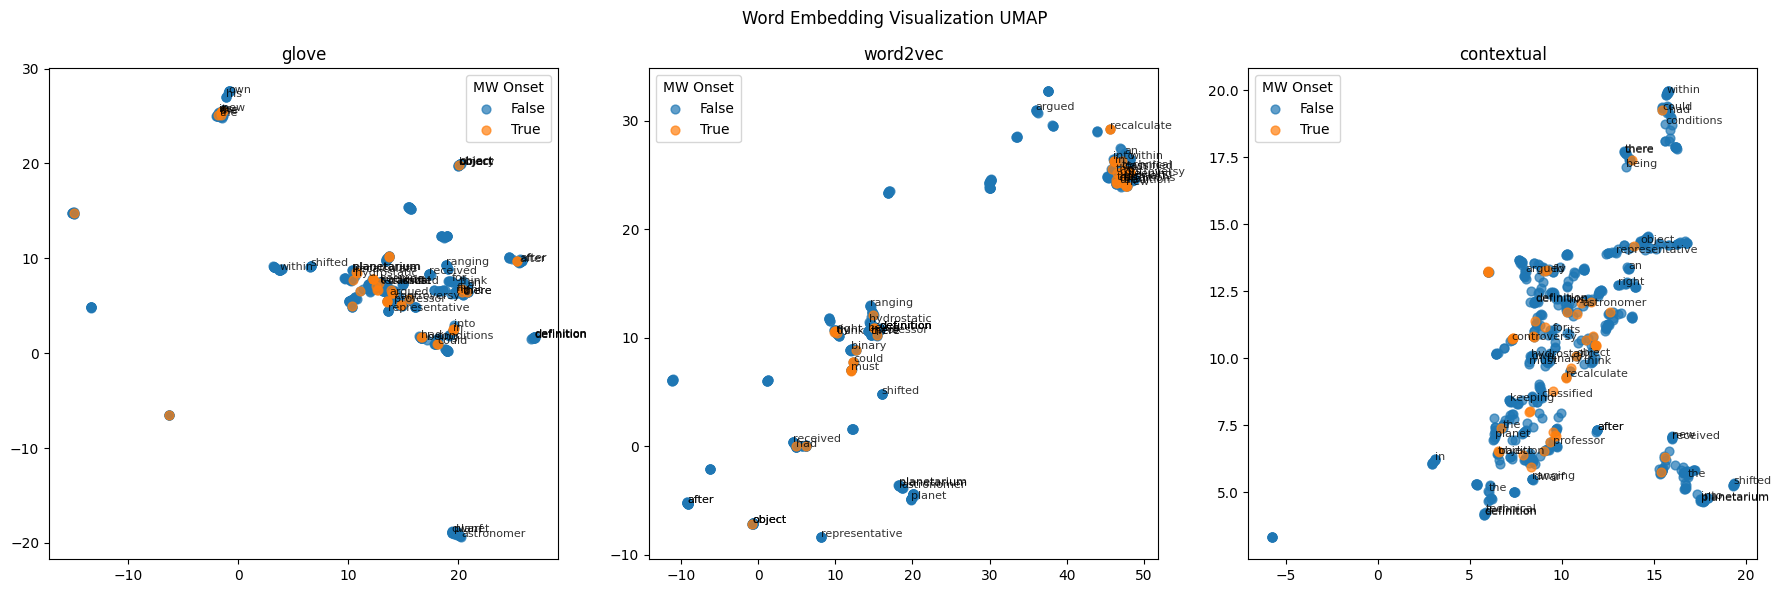

In [38]:
import numpy as np
import ast
import umap
import matplotlib.pyplot as plt

df_ori = df.copy()

cols = ["glove", "word2vec", "contextual"]

plt.figure(figsize=(18, 6))

for col in cols:
    df = df.dropna(subset=[col])
    df[col] = df[col].apply(
        lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x
    )

    X = np.vstack(df[col].values)

    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=15,
        min_dist=0.1,
        random_state=42
    )

    coords = reducer.fit_transform(X)
    df["x"] = coords[:, 0]
    df["y"] = coords[:, 1]

    plt.subplot(1, 3, cols.index(col)+1)
    for g, sub in df.groupby("is_mw_onset"):
        plt.scatter(
            sub["x"],
            sub["y"],
            label=g,
            alpha=0.7,
            s=40
        )

    for _, r in df.sample(50, random_state=1).iterrows():
        plt.text(
            r["x"],
            r["y"],
            r["fix_fixed_word"],
            fontsize=8,
            alpha=0.8
        )

    plt.legend(title="MW Onset")
    plt.title(col)

plt.suptitle("Word Embedding Visualization UMAP")
plt.tight_layout()

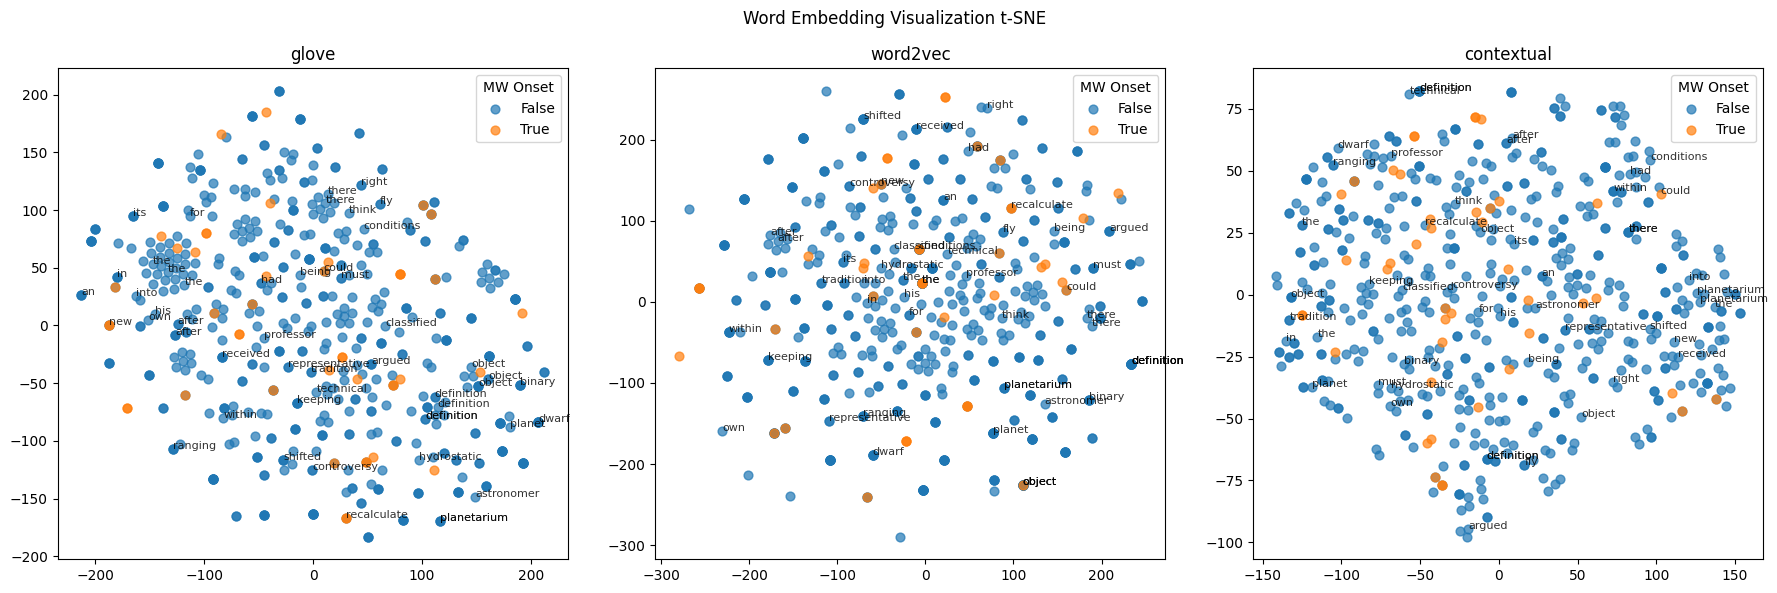

In [39]:
import numpy as np
import ast
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df_ori = df.copy()

cols = ["glove", "word2vec", "contextual"]

plt.figure(figsize=(18, 6))

for col in cols:
    df = df.dropna(subset=[col])
    df[col] = df[col].apply(
        lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x
    )

    X = np.vstack(df[col].values)

    tsne = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate="auto",
        init="pca",
        random_state=42
    )

    coords = tsne.fit_transform(X)
    df["x"] = coords[:, 0]
    df["y"] = coords[:, 1]

    plt.subplot(1, 3, cols.index(col)+1)
    for g, sub in df.groupby("is_mw_onset"):
        plt.scatter(
            sub["x"],
            sub["y"],
            label=g,
            alpha=0.7,
            s=40
        )

    for _, r in df.sample(50, random_state=1).iterrows():
        plt.text(
            r["x"],
            r["y"],
            r["fix_fixed_word"],
            fontsize=8,
            alpha=0.8
        )

    plt.legend(title="MW Onset")
    plt.title(col)

plt.suptitle("Word Embedding Visualization t-SNE")
plt.tight_layout()

/users/h/s/hsun11/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/users/h/s/hsun11/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/users/h/s/hsun11/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


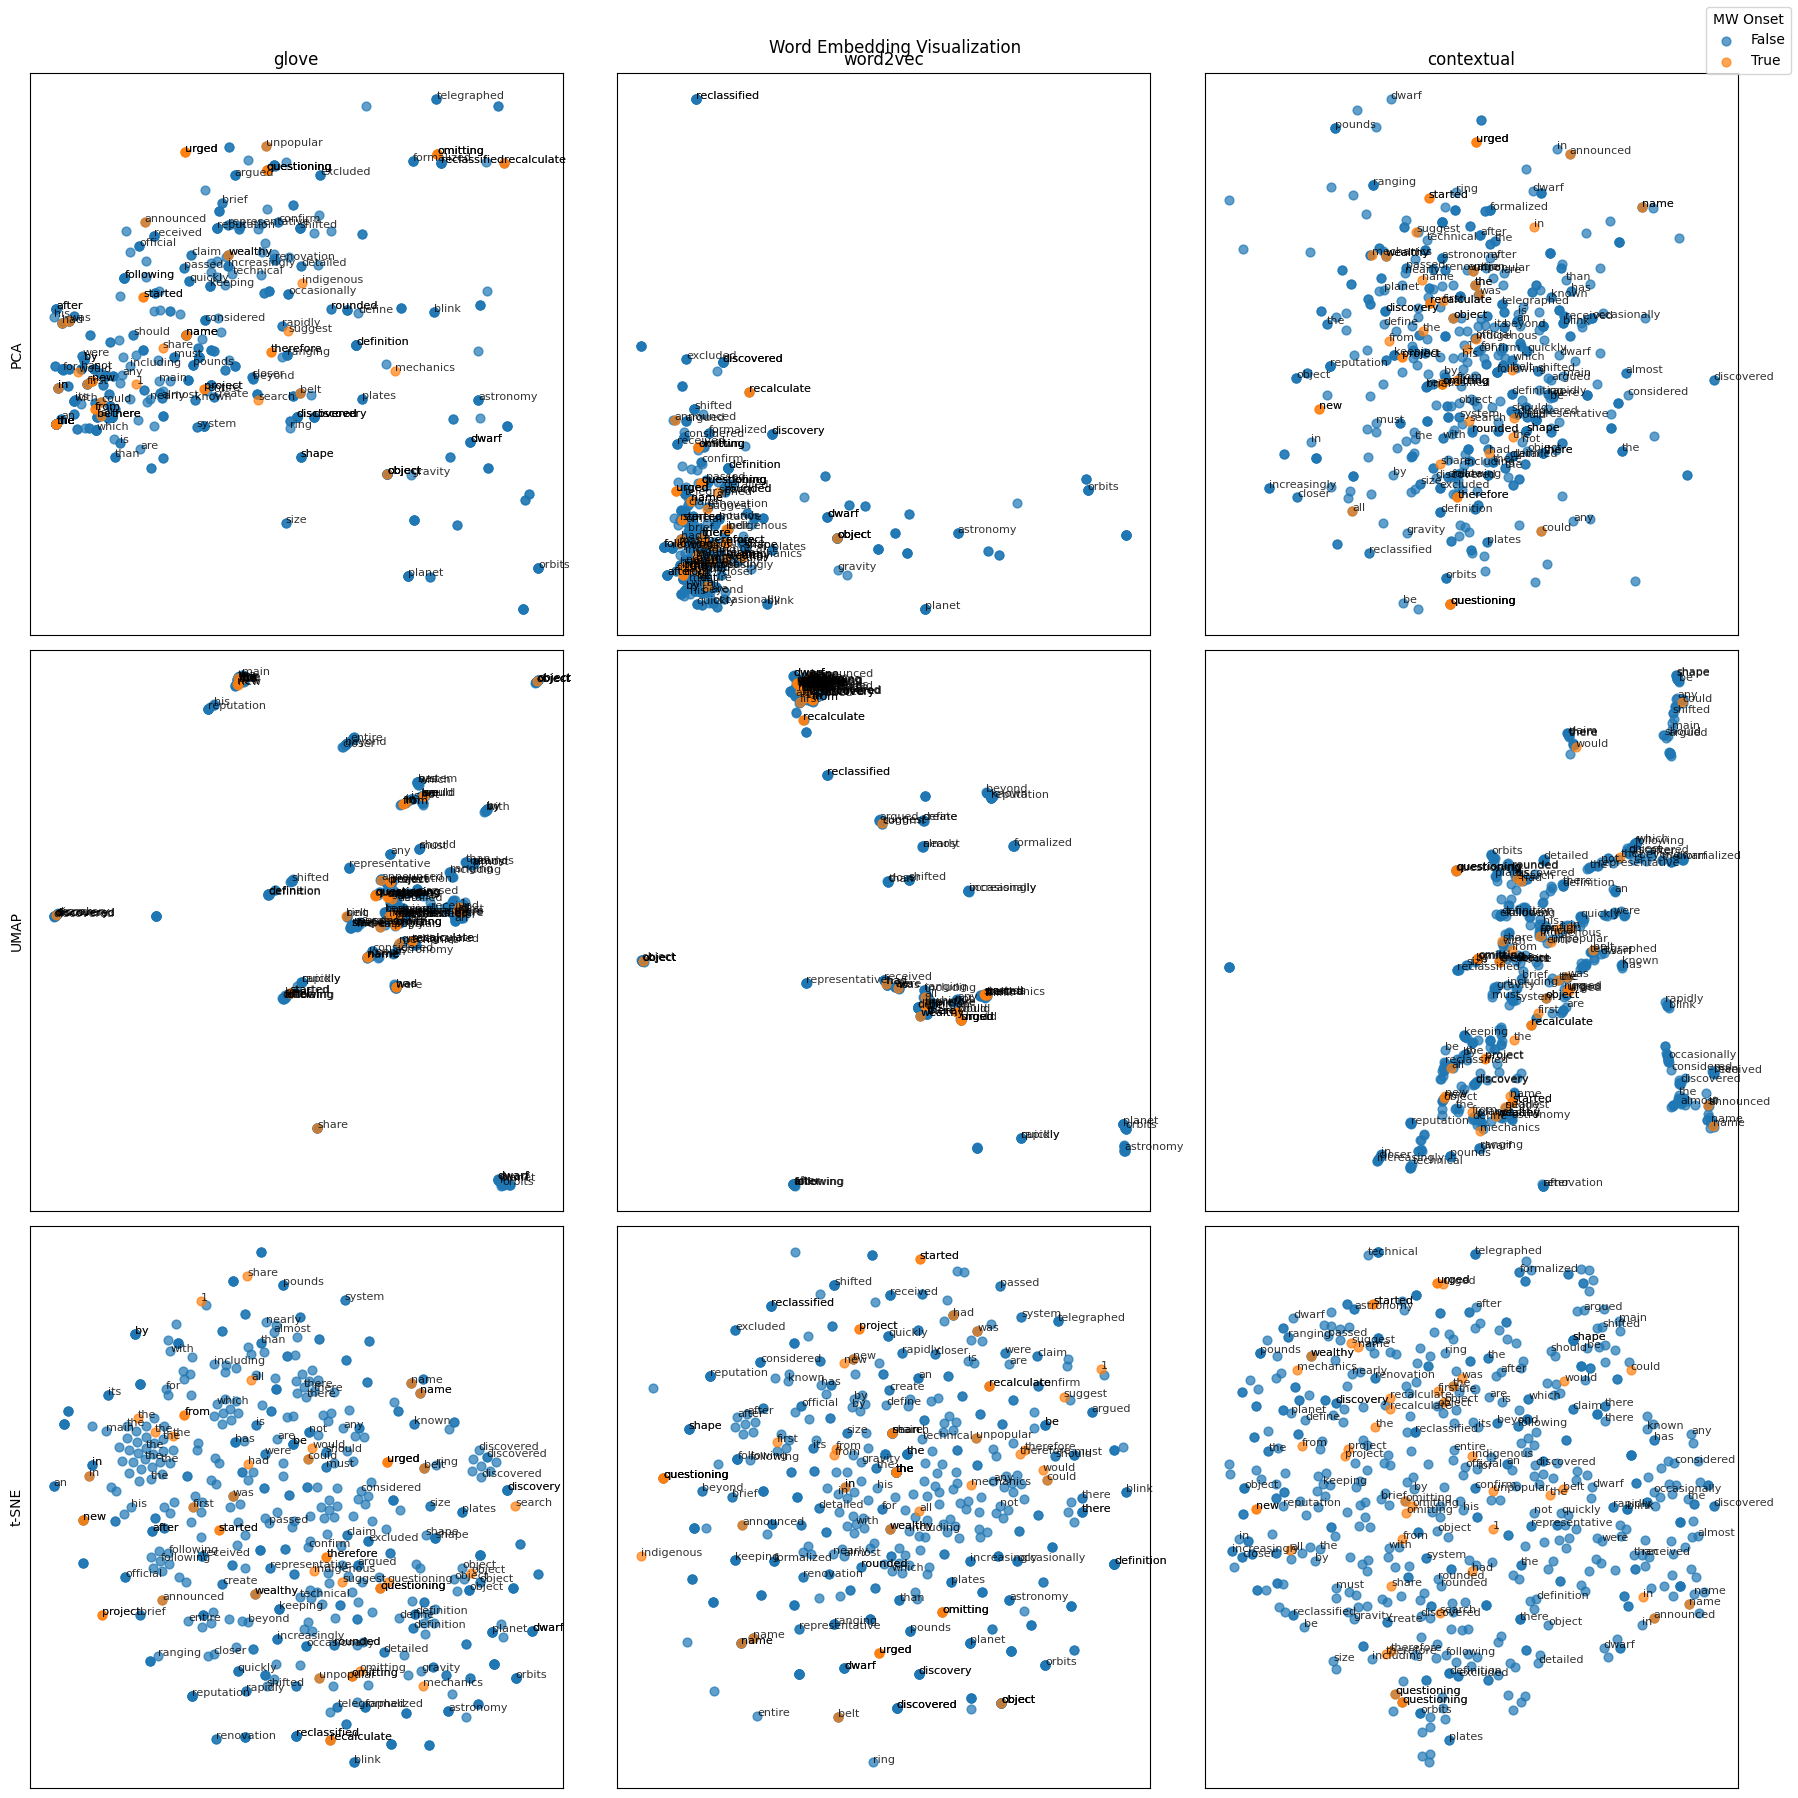

In [41]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

methods = ["PCA", "UMAP", "t-SNE"]
cols = ["glove", "word2vec", "contextual"]

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

df_ori = df.copy()

for i, method in enumerate(methods):
    for j, col in enumerate(cols):

        df = df_ori.dropna(subset=[col]).copy()

        # convert embedding strings → arrays
        df[col] = df[col].apply(
            lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else x
        )

        X = np.vstack(df[col].values)

        # dimensionality reduction
        if method == "PCA":
            reducer = PCA(n_components=2, random_state=42)
            coords = reducer.fit_transform(X)

        elif method == "UMAP":
            reducer = umap.UMAP(
                n_components=2,
                n_neighbors=15,
                min_dist=0.1,
                random_state=42
            )
            coords = reducer.fit_transform(X)

        elif method == "t-SNE":
            reducer = TSNE(
                n_components=2,
                perplexity=30,
                learning_rate="auto",
                init="pca",
                random_state=42
            )
            coords = reducer.fit_transform(X)

        df["x"], df["y"] = coords[:, 0], coords[:, 1]

        ax = axes[i, j]

        # scatter by MW onset
        for g, sub in df.groupby("is_mw_onset"):
            ax.scatter(
                sub["x"],
                sub["y"],
                label=g,
                alpha=0.7,
                s=40
            )

        # ---- text labels ----
        mw_df = df[df["is_mw_onset"]]
        non_mw_df = df[~df["is_mw_onset"]].sample(
            min(100, len(df)),
            random_state=1
        )

        label_df = pd.concat([mw_df, non_mw_df])

        for _, r in label_df.iterrows():
            ax.text(
                r["x"],
                r["y"],
                r["fix_fixed_word"],
                fontsize=8,
                alpha=0.8
            )

        # titles & labels
        if i == 0:
            ax.set_title(col)
        if j == 0:
            ax.set_ylabel(method)

        ax.set_xticks([])
        ax.set_yticks([])

# shared legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="MW Onset", loc="upper right")

plt.suptitle("Word Embedding Visualization")
plt.tight_layout()